In [985]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dask
dask.config.set({'dataframe.query-planning': True})
import dask.dataframe as dd
import pprint

# Get an overview of the data

In [986]:
# Load dataframe
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [987]:
df.shape

(8807, 12)

In [988]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

# Check columns with nulls

In [989]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [990]:
# From above info: 'director', 'country', 'cast' have most nulls consecutively
# Now confirm the column with most nulls
most_nulls_column = df.isnull().sum().idxmax()
most_nulls_column

'director'

### Dealing with null values in 'director' column

In [991]:
# Since 'director' column has most nulls, view what's the null designation
# In this case it's 'NaN'
df['director'].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [992]:
# Get the null values count
df['director'].isnull().sum()

2634

In [993]:
# Find how missing values are represented in the column: 
def missing_val_representation(column):
    missing_val = set()
    for val in column:
        if pd.isna(val) or val == "NaN" or val == "NA":
            missing_val.add(val)
    return missing_val

missing_val_representation(df['director'])

{nan}

In [994]:
# Replace null values in director column with 'Unavailable'
df['director'] = df['director'].apply(lambda x: 'Unavailable' if pd.isna(x) == True else x)

In [995]:
# Check how many null values in 'director' column
df['director'].isnull().sum()  # The count is now 0

0

In [996]:
# Check the info summary once more
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Dealing with null values in 'country' column

In [997]:
# Confirm count of non-null values is equal to one above 
null_value_count_country_col = df['country'].isnull().sum()
non_null_value_count_country_col = len(df) - null_value_count_country_col

print(f"Non-null value count in 'country': {non_null_value_count_country_col}")
print(f"Null value count in 'country': {null_value_count_country_col}")

Non-null value count in 'country': 7976
Null value count in 'country': 831


In [998]:
# Replace null values in ‘country’ column with ‘Not Available’
df['country'] = df['country'].apply(lambda x: 'Unknown' if pd.isna(x) == True else x)

In [999]:
# Confirm all null values in 'country' have been replaced
null_value_count_country_col = df['country'].isnull().sum()
print(f"Null value count 'country' col after removal: {null_value_count_country_col}")

Null value count 'country' col after removal: 0


In [1000]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Dealing with null values in ‘cast’ column

In [1001]:
# Confirm count of non values in 'cast' column (Hence all other values are null)
null_vals_count_cast_col = df['cast'].isnull().sum()
non_null_vals_in_cast_col = len(df) - null_vals_count_cast_col

print(f"Non-null value count in 'country': {non_null_vals_in_cast_col}")
print(f"Null value count in 'country': {null_vals_count_cast_col}")

Non-null value count in 'country': 7982
Null value count in 'country': 825


In [1002]:
# Replacing all null values in 'cast' column with "Unavailable"
df['cast'] = df['cast'].apply(lambda x: "Unavailable" if pd.isna(x) == True else x)

In [1003]:
# Confirm all null values in 'cast' have been removed
df['cast'].isnull().sum()

0

In [1004]:
# Confirm summary info once more
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Cleaning date_added column

In [1005]:
# Checking the number of null and non-null values
# Confirm count of non values in 'cast' column (Hence all other values are null)
null_vals_date_added_col = df['date_added'].isnull().sum()
non_null_vals_date_added_col = len(df) - null_vals_date_added_col

print(f"Non-null value count in 'country': {non_null_vals_date_added_col}")
print(f"Null value count in 'country': {null_vals_date_added_col}")

Non-null value count in 'country': 8797
Null value count in 'country': 10


In [1006]:
# Returning rows with null values
rows_with_null_date_added_col = df[df['date_added'].isnull()]
rows_with_null_date_added_col

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unavailable,Igor Dmitriev,Unknown,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unavailable,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unavailable,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unavailable,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unavailable,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [1007]:
# Returning null values rows together with adjacent rows to decide on the filling date
# Whether to ffill or bfill

null_indexes = df[df['date_added'].isnull()].index

rows_to_include = []

for index in null_indexes:
    if index > 0:
        rows_to_include.append(index - 1)
    rows_to_include.append(index)
    if index < len(df) - 1:
        rows_to_include.append(index + 1)

# iloc is used for integer-based indexing, selects rows at those indexes
null_date_added_rows_plus_adjacent_ones = df.iloc[rows_to_include]
null_date_added_rows_plus_adjacent_ones 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6065,s6066,Movie,A Wrinkle in Time,Ava DuVernay,"Storm Reid, Oprah Winfrey, Reese Witherspoon, ...",United States,"September 25, 2018",2018,PG,110 min,Children & Family Movies,"Years after their father disappears, Meg and h..."
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6067,s6068,TV Show,A.D. Kingdom and Empire,Unavailable,"Juan Pablo Di Pace, Adam Levy, Chipo Chung, Ba...",United States,"December 15, 2017",2015,TV-14,1 Season,TV Dramas,"In the wake of Jesus Christ's crucifixion, his..."
6173,s6174,Movie,Antariksha Ke Rakhwale,Anirban Majumder,"Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sa...",Unknown,"June 18, 2019",2018,TV-Y7,65 min,Children & Family Movies,Space villains have abducted all the superhero...
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6175,s6176,Movie,Antidote,Ken Barbet,"Randy Couture, Chuck Zito, Wil Traval, Celeste...",United States,"April 14, 2019",2018,TV-MA,90 min,"Action & Adventure, Horror Movies",A tough-as-nails treasure hunter protects a hu...
6794,s6795,Movie,Frances Ha,Noah Baumbach,"Greta Gerwig, Mickey Sumner, Charlotte d'Amboi...","United States, Brazil","October 1, 2017",2012,R,86 min,"Comedies, Dramas, Independent Movies",Determined to make it as a modern dancer in Ne...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6796,s6797,Movie,Freak Show,Trudie Styler,"Alex Lawther, Abigail Breslin, AnnaSophia Robb...",United States,"August 13, 2020",2018,TV-MA,91 min,"Comedies, Dramas, Independent Movies","Forced to attend a new high school, a glamorou..."
6805,s6806,Movie,Friend Request,Simon Verhoeven,"Alycia Debnam-Carey, William Moseley, Connor P...",Germany,"April 18, 2018",2016,R,92 min,"Horror Movies, International Movies",A popular college student's love of social med...


In [1008]:
# Getting the indexes of the null values
date_added_null_values_indexes = df[df['date_added'].isnull()].index
date_added_null_values_indexes

Index([6066, 6174, 6795, 6806, 6901, 7196, 7254, 7406, 7847, 8182], dtype='int64')

In [1009]:
# Check date format
df['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [1010]:
# Check if it's type date
type(df['date_added'][0])

str

In [1011]:
# Since it's a string. Convert values in the column to datetime objects
# df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors="coerce")
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=True)

# Check if type has changed
# type(df['date_added'][0])

In [1012]:
df['date_added'].unique()

<DatetimeArray>
['2021-09-25 00:00:00', '2021-09-24 00:00:00', '2021-09-23 00:00:00',
 '2021-09-22 00:00:00', '2021-09-21 00:00:00', '2021-09-20 00:00:00',
 '2021-09-19 00:00:00', '2021-09-17 00:00:00', '2021-09-16 00:00:00',
 '2021-09-15 00:00:00',
 ...
 '2018-09-27 00:00:00', '2017-03-23 00:00:00', '2016-12-25 00:00:00',
 '2016-11-30 00:00:00', '2017-10-23 00:00:00', '2017-11-04 00:00:00',
 '2015-08-05 00:00:00', '2018-12-06 00:00:00', '2016-03-09 00:00:00',
 '2020-01-11 00:00:00']
Length: 1715, dtype: datetime64[ns]

In [1013]:
# Confirming that only the original null values indexes still exist
date_added_null_values_indexes = df[df['date_added'].isnull()].index
date_added_null_values_indexes

Index([6066, 6174, 6795, 6806, 6901, 7196, 7254, 7406, 7847, 8182], dtype='int64')

In [1014]:
# Getting the count of null values
null_vals_date_added_col = df['date_added'].isnull().sum()
null_vals_date_added_col

10

In [1015]:
# Checking the type of converted time column values
type(df['date_added'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [1016]:
# Interpolate the null date values
df['date_added'] = df['date_added'].interpolate(method='linear')

In [1017]:
# Getting the count of null values
null_vals_date_added_col = df['date_added'].isnull().sum()
null_vals_date_added_col 

0

In [1018]:
# iloc is used for integer-based indexing, selects rows at those indexes
null_date_added_rows_plus_adjacent_ones = df.iloc[rows_to_include]
null_date_added_rows_plus_adjacent_ones 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6065,s6066,Movie,A Wrinkle in Time,Ava DuVernay,"Storm Reid, Oprah Winfrey, Reese Witherspoon, ...",United States,2018-09-25 00:00:00,2018,PG,110 min,Children & Family Movies,"Years after their father disappears, Meg and h..."
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2018-05-06 00:00:00,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6067,s6068,TV Show,A.D. Kingdom and Empire,Unavailable,"Juan Pablo Di Pace, Adam Levy, Chipo Chung, Ba...",United States,2017-12-15 00:00:00,2015,TV-14,1 Season,TV Dramas,"In the wake of Jesus Christ's crucifixion, his..."
6173,s6174,Movie,Antariksha Ke Rakhwale,Anirban Majumder,"Sonal Kaushal, Rupa Bhimani, Julie Tejwani, Sa...",Unknown,2019-06-18 00:00:00,2018,TV-Y7,65 min,Children & Family Movies,Space villains have abducted all the superhero...
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,2019-05-16 12:00:00,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6175,s6176,Movie,Antidote,Ken Barbet,"Randy Couture, Chuck Zito, Wil Traval, Celeste...",United States,2019-04-14 00:00:00,2018,TV-MA,90 min,"Action & Adventure, Horror Movies",A tough-as-nails treasure hunter protects a hu...
6794,s6795,Movie,Frances Ha,Noah Baumbach,"Greta Gerwig, Mickey Sumner, Charlotte d'Amboi...","United States, Brazil",2017-10-01 00:00:00,2012,R,86 min,"Comedies, Dramas, Independent Movies",Determined to make it as a modern dancer in Ne...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2019-03-08 12:00:00,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6796,s6797,Movie,Freak Show,Trudie Styler,"Alex Lawther, Abigail Breslin, AnnaSophia Robb...",United States,2020-08-13 00:00:00,2018,TV-MA,91 min,"Comedies, Dramas, Independent Movies","Forced to attend a new high school, a glamorou..."
6805,s6806,Movie,Friend Request,Simon Verhoeven,"Alycia Debnam-Carey, William Moseley, Connor P...",Germany,2018-04-18 00:00:00,2016,R,92 min,"Horror Movies, International Movies",A popular college student's love of social med...


In [1019]:
# Converting date_added col from Timestamp (date & time) to date only
# after interpolating the null values
df['date_added'] = df['date_added'].dt.date

# Now checking the type of the converted column
type(df['date_added'][0])

datetime.date

In [1020]:
# Viewing the converted types
df['date_added'].head()

0    2021-09-25
1    2021-09-24
2    2021-09-24
3    2021-09-24
4    2021-09-24
Name: date_added, dtype: object

In [1021]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Dropping the null rows

In [1022]:
df.dropna(inplace=True)

In [1023]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8800 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8800 non-null   object
 1   type          8800 non-null   object
 2   title         8800 non-null   object
 3   director      8800 non-null   object
 4   cast          8800 non-null   object
 5   country       8800 non-null   object
 6   date_added    8800 non-null   object
 7   release_year  8800 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8800 non-null   object
 11  description   8800 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.8+ KB


In [1024]:
# Convert movies duration to minutes
df.duration.head()

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

## Drop the show_id column 

In [1025]:
df = df.drop(['show_id'], axis=1)

## Cleaning the 'country' column

In [1026]:
# Check first few columns first
df['country'].head(10)

0                                        United States
1                                         South Africa
2                                              Unknown
3                                              Unknown
4                                                India
5                                              Unknown
6                                              Unknown
7    United States, Ghana, Burkina Faso, United Kin...
8                                       United Kingdom
9                                        United States
Name: country, dtype: object

In [1027]:
df.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


#### Splitting the rows with multiple countries in a cell into as many rows as countries

In [1028]:
# # Explode the rows with multiple countries to each country own row...
# # ... but retaining all other columns the same
# SOLUTION 1: MEMORY OVERFLOW
# def split_rows_with_multiple_countries(df):
#     rows_to_append = []
#     for idx, row in df.iterrows():
#         nations = df['country'].str.split(', ')
#         if len(nations) > 1: 
#             for nation in nations:
#                 new_row = row.copy()
#                 new_row['country'] = nation
#                 rows_to_append.append(new_row)
#     df = pd.concat([df, pd.DataFrame(rows_to_append)], ignore_index=True)
#     df = df.reset_index(drop=True)  # Create a new index
#     # Remove original rows with multiple countries with boolean mask
#     return df[df['country'].str.contains(', ') == False] 


# SOLUTION 2: MEMORY OVERFLOW
# def split_rows_with_multiple_countries(ddf):
#     def explode(row):
#         countries = row['country'].str.split(', ')
#         for country in countries:
#             yield {'country': country, **row.iloc[:-1]}  # Unpack other columns
#     return ddf.explode('country').to_pandas()
# 
# ddf = dd.from_pandas(df, npartitions=4)
# df = split_rows_with_multiple_countries(ddf)
# df.info()



# SOLUTION 3: MEMORY EFFICIENT
def split_rows_with_multiple_countries(df):
    rows_to_append = []
    # Split the 'country' column once (Adds a new column called 'country_split')
    df['country_split'] = df['country'].str.split(', ')
    # Iterate over each row
    for idx, row in df.iterrows():
        nations = row['country_split']
        # nations = df['country'].str.split(', ')
        if len(nations) > 1:
            for nation in nations:
                new_row = row.copy()
                new_row['country'] = nation
                rows_to_append.append(new_row.to_dict())
    # Concatenate the original DataFrame with the new rows
    df = pd.concat([df, pd.DataFrame(rows_to_append)], ignore_index=True)
    # Remove original rows with multiple countries using boolean mask
    df = df[df['country'].str.contains(', ') == False]
    # Reset index
    df = df.reset_index(drop=True)
    # Drop the temporary 'country_split' column
    df.drop(columns=['country_split'], inplace=True)
    return df
    

df = split_rows_with_multiple_countries(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          10838 non-null  object
 1   title         10838 non-null  object
 2   director      10838 non-null  object
 3   cast          10838 non-null  object
 4   country       10838 non-null  object
 5   date_added    10838 non-null  object
 6   release_year  10838 non-null  int64 
 7   rating        10838 non-null  object
 8   duration      10838 non-null  object
 9   listed_in     10838 non-null  object
 10  description   10838 non-null  object
dtypes: int64(1), object(10)
memory usage: 931.5+ KB


#### The rows with multiple countries have now been split as shown below
__-Film titled "Sankofa" was at index 7 before splitting & is now 6 rows diff'nt countries__

In [1029]:
df[df['title'] == "Sankofa"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7484,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7485,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7486,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7487,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7488,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
7489,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ethiopia,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


# DATA VISUALIZATION SECTION

## 1) Understanding what content is available in different countries.

### Plotting country counts

In [1030]:
# Show the counts of different countries
df['country'].nunique()

128

In [1031]:
df['country'].unique()  # There are 128 unique countries

array(['United States', 'South Africa', 'Unknown', 'India',
       'United Kingdom', 'Mexico', 'Turkey', 'Australia', 'Finland',
       'Nigeria', 'Japan', 'France', 'Belgium', 'South Korea', 'Spain',
       'Russia', 'Canada', 'Hong Kong', 'Ireland', 'Italy', 'Argentina',
       'Jordan', 'Colombia', 'Brazil', 'Taiwan', 'Poland', 'Germany',
       'New Zealand', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       'Malaysia', 'Israel', 'Vietnam', 'Sweden', 'China', 'Lebanon',
       'Romania', 'Philippines', 'Iceland', 'Denmark',
       'United Arab Emirates', 'Netherlands', 'Mauritius', 'Austria',
       'Cameroon', 'United Kingdom,', 'Kenya', 'Uruguay', 'Luxembourg',
       'Bangladesh', 'Norway', 'Senegal', 'Singapore', 'Kuwait',
       'Namibia', 'Mozambique', 'Belarus', 'Ghana', 'Chile', 'Zimbabwe',
       'Hungary', 'Cyprus', 'Switzerland', 'Pakistan', 'Croatia', 'Peru',
       'United States,', 'Cambodia', 'Bulgaria', 'Georgia',
       'West Germany', 'Venezuela', 'Poland,'

In [1032]:
# Check value counts 
countries = df['country'].value_counts()
countries

country
United States     3686
India             1046
Unknown            830
United Kingdom     804
Canada             445
                  ... 
Slovakia             1
Bermuda              1
Ecuador              1
Armenia              1
Montenegro           1
Name: count, Length: 128, dtype: int64

In [1033]:
# For proper smaller plot, cluster countries with count less than 30 in a one dataframe
countries_counts_less_than_30 = countries[countries < 30]
print(f"No. of countries with counts less than 30: {len(countries_counts_less_than_30)}")

No. of countries with counts less than 30: 90


In [1034]:
# View the countries with counts less than 30
countries_counts_less_than_30

country
Chile             29
Russia            27
Malaysia          26
Pakistan          24
Czech Republic    22
                  ..
Slovakia           1
Bermuda            1
Ecuador            1
Armenia            1
Montenegro         1
Name: count, Length: 90, dtype: int64

In [1035]:
# Rename countries with counts less than 30 as 'Others'
df['country'] = df['country'].apply(lambda x: "Others" if x in countries_counts_less_than_30 else x)

# Check value counts after renaming
df['country'].value_counts()

country
United States           3686
India                   1046
Unknown                  830
United Kingdom           804
Others                   449
Canada                   445
France                   393
Japan                    317
Spain                    232
South Korea              231
Germany                  226
Mexico                   169
China                    162
Australia                159
Egypt                    117
Turkey                   113
Hong Kong                105
Nigeria                  103
Italy                     99
Brazil                    97
Argentina                 91
Belgium                   90
Indonesia                 90
Taiwan                    89
Philippines               83
Thailand                  70
South Africa              62
Colombia                  52
Netherlands               50
Denmark                   48
Ireland                   46
Sweden                    42
Singapore                 41
Poland                    40
United

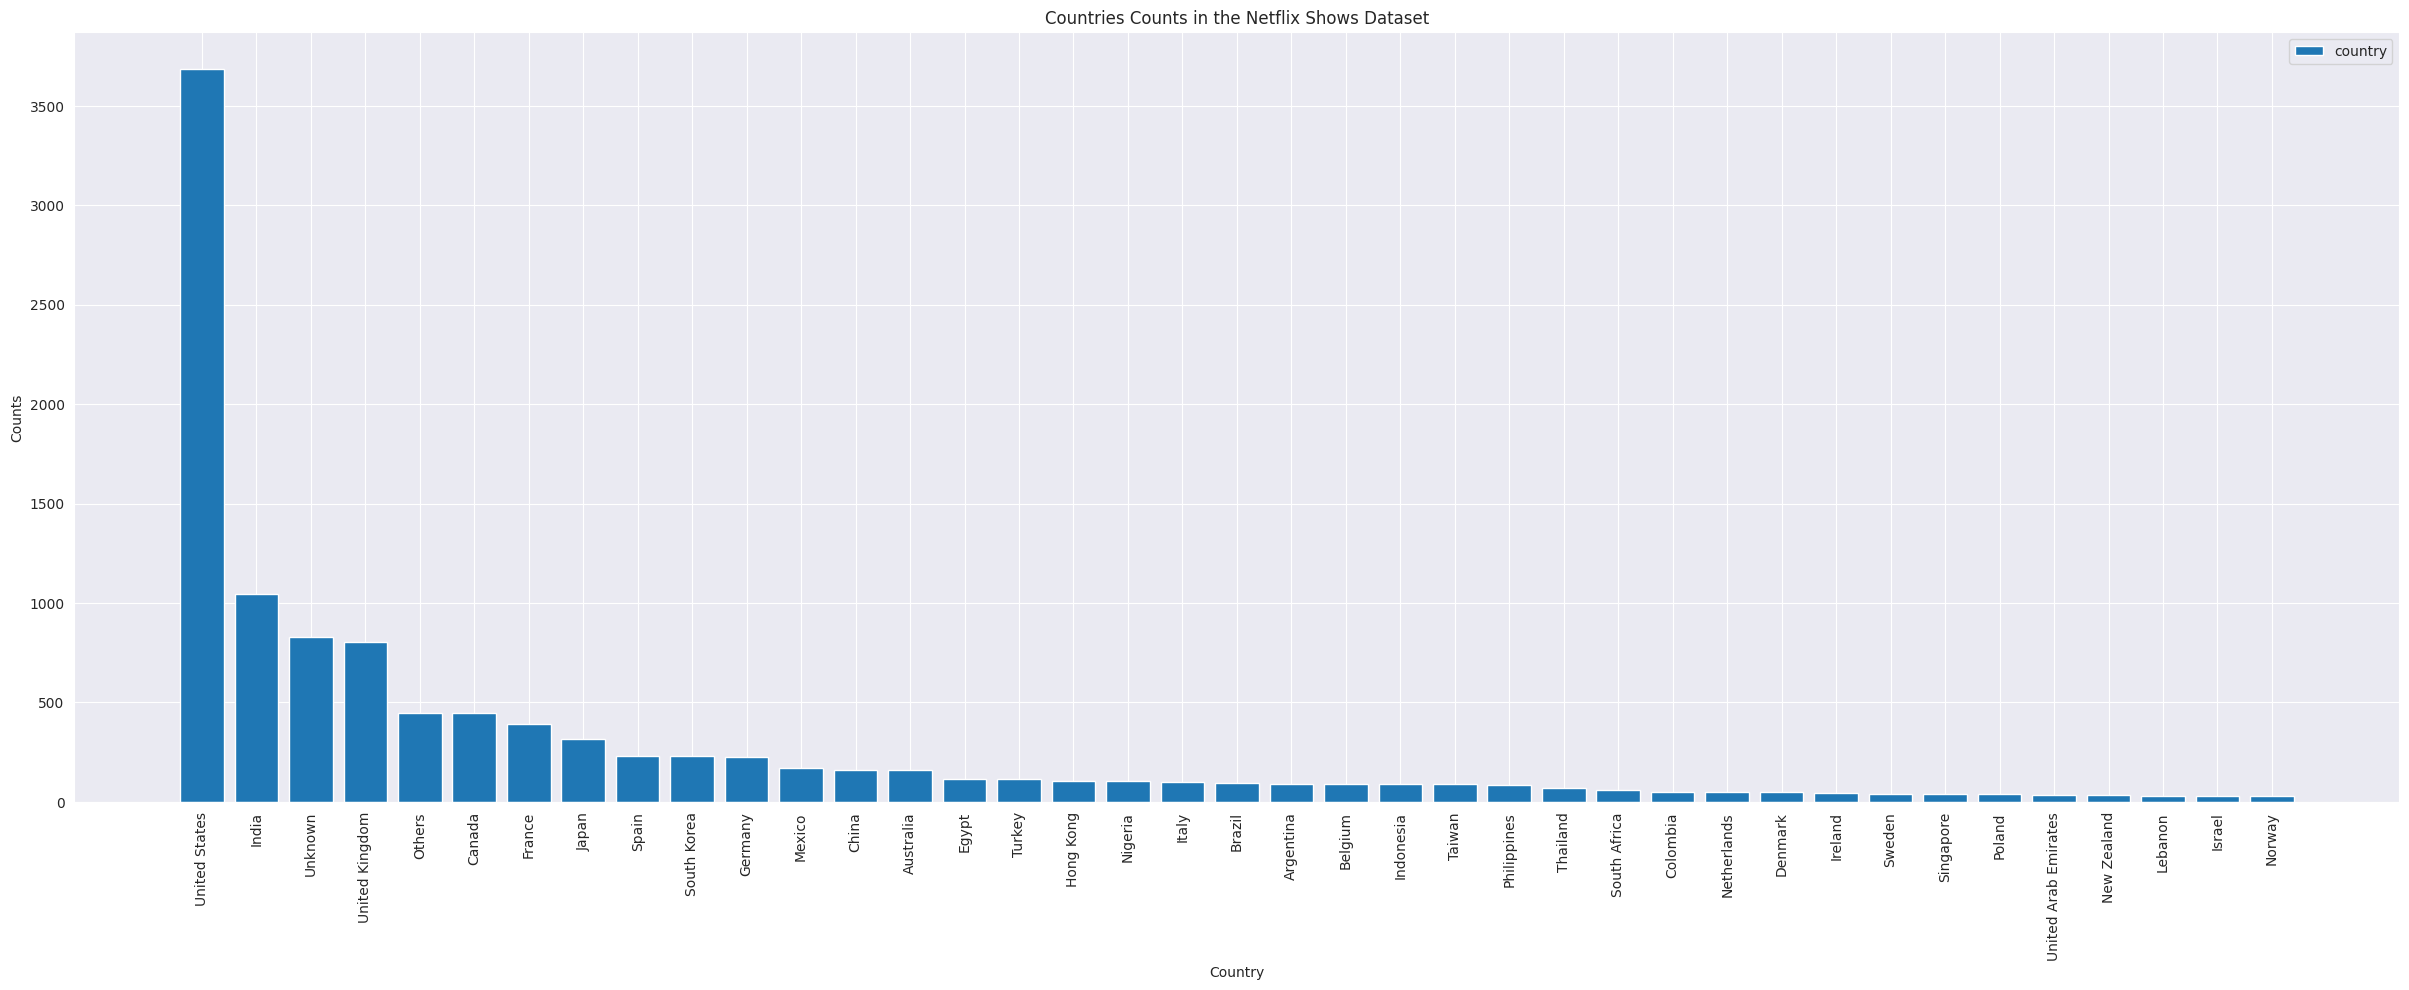

In [1036]:
# Plotting the counts of different countries
# Chart size definition:
plt.figure(figsize=(30,10))

# Extract counts (indexes & values)
countries = df['country'].value_counts()
country_idx = countries.index
country_vals = countries.values

# Defining chart labels
plt.xlabel("Country")
plt.xticks(rotation=90)
plt.ylabel("Counts")
plt.title("Countries Counts in the Netflix Shows Dataset")

# Plotting
plt.bar(country_idx, country_vals, label='country')
plt.legend()

# plt.savefig('country_counts.png',bbox_inches="tight",pad_inches=2,transparent=False)

In [1037]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [1038]:
df.head(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,Unavailable,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,Unavailable,Unavailable,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,Unavailable,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
8,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
9,TV Show,"Vendetta: Truth, Lies and The Mafia",Unavailable,Unavailable,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."


### Visualizing film type per country

Text(0.5, 1.0, 'Film Type per Country')

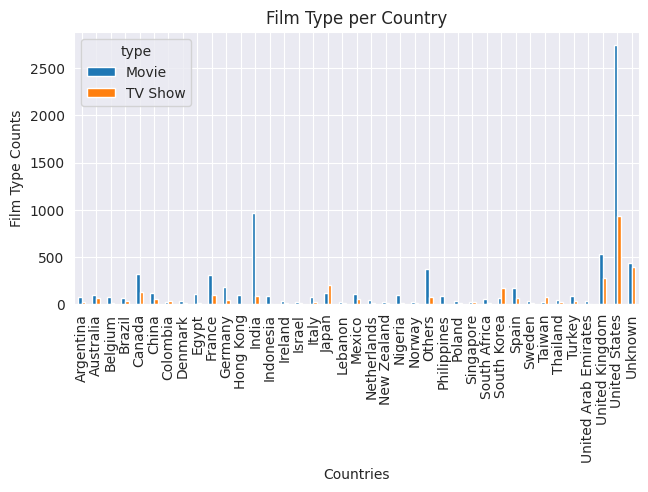

In [1039]:
# SOLUTION 1: Using Pivot Table
# df1 = df.groupby(['country','type'])['title'].count()
# df1.to_csv('film_type_by_country.csv')
# 
# # Read grouped csv data and create pivot table
# df1 = pd.read_csv('film_type_by_country.csv')
# df1 = pd.pivot_table(df1,index=['country'],columns=['type'],fill_value=0,values=None,aggfunc="sum")
# df1
# # Plotting
# df1.plot(kind="bar", figsize=(30,10))
# 
# # Set labels
# plt.tight_layout()
# plt.xlabel("Countries")
# plt.xticks(rotation=90)
# plt.ylabel("Film Type Counts")
# plt.title("Film Type per Country")

# SOLUTION 2: Using size().unstack() on grouped data
# Grouping the data
df1 = df.groupby(['country', 'type']).size().unstack()

# Plotting
df1.plot(kind="bar", stacked=False)
# type_vals_arr = df1['Movie'].value_counts().values

plt.tight_layout()
plt.xlabel("Countries")
plt.xticks(rotation=90)
plt.ylabel("Film Type Counts")
# plt.yticks(np.arange(0, max(type_vals_arr)+1, step=500))
plt.title("Film Type per Country")
